# Presidential Request from the USA government

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import frange
import seaborn as sb
from matplotlib import rcParams

In [4]:
# Indexing the data
data_path = './data/data_request.xlsx'
data = pd.read_excel(data_path)

In [5]:
# I just view my data
data.head(11)

,President,Year,Total Requests,First-time Requests,Repeat Requests
0,Truman I,1946,41.0,16.0,25.0
1,Truman I,1947,23.0,21.0,2.0
2,Truman I,1948,16.0,6.0,9.0
3,Truman II,1949,28.0,17.0,11.0
4,Truman II,1950,20.0,9.0,11.0
5,Truman II,1951,11.0,5.0,6.0
6,Truman II,1952,19.0,7.0,12.0
7,Eisenhower,1953,14.0,14.0,0.0
8,Eisenhower,1954,39.0,35.0,4.0
9,Eisenhower,1955,32.0,19.0,14.0


#### As Eisenhower's data has NaN values, we need to replaced by 0

In [6]:
# With fillna we can change the value of a Nan by "0"
fill_data = data.fillna(0)
fill_data.head(12)

,President,Year,Total Requests,First-time Requests,Repeat Requests
0,Truman I,1946,41.0,16.0,25.0
1,Truman I,1947,23.0,21.0,2.0
2,Truman I,1948,16.0,6.0,9.0
3,Truman II,1949,28.0,17.0,11.0
4,Truman II,1950,20.0,9.0,11.0
5,Truman II,1951,11.0,5.0,6.0
6,Truman II,1952,19.0,7.0,12.0
7,Eisenhower,1953,14.0,14.0,0.0
8,Eisenhower,1954,39.0,35.0,4.0
9,Eisenhower,1955,32.0,19.0,14.0


##### Ploting the data to look for anr trends or values

Text(0,0.5,'No. Presidential Request')

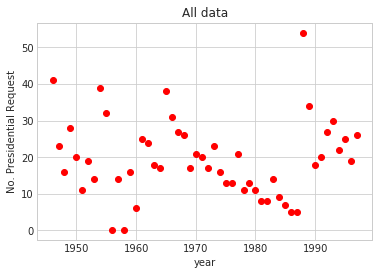

In [7]:
#We need to create the X and Y data for the graph
#NOTE= I use iloc because orther wise I got an error for using 'slice' method
x = fill_data.iloc[:, 1]
y = fill_data.iloc[:, 2]

############Ploting###################
# Configuring the framework
%matplotlib inline
sb.set_style('whitegrid')

# Seting up the plot
plt.close()
plt.figure(1)
#with figure I just enumerate my graphs
plt.title("All data")
plt.plot(x, y, 'ro')
plt.xlabel('year')
plt.ylabel('No. Presidential Request')


### Calculating the percentile values

In [8]:
# Using the method 'describe' I found the percentile statistics
stats = pd.DataFrame(fill_data.describe())
stats

,Year,Total Requests,First-time Requests,Repeat Requests
count,52.000000,52.000000,52.000000,52.000000
mean,1971.500000,19.461538,11.961538,3.403846
std,15.154757,10.626385,9.050970,5.580989
min,1946.000000,0.000000,0.000000,0.000000
25%,1958.750000,13.000000,6.000000,0.000000
50%,1971.500000,18.500000,10.500000,0.000000
75%,1984.250000,25.250000,16.250000,6.500000
max,1997.000000,54.000000,35.000000,25.000000


In [9]:
print(stats.iloc[:, 1])

count    52.000000
mean     19.461538
std      10.626385
min       0.000000
25%      13.000000
50%      18.500000
75%      25.250000
max      54.000000
Name: Total Requests , dtype: float64


In [10]:
# Creating an object to save each percentile of the Label
perc_25_request = stats.iloc[4 , 1]
perc_50_request = stats.iloc[5 , 1]
perc_75_request = stats.iloc[6 , 1]


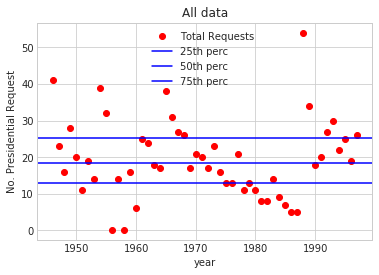

In [11]:
# Seting up the NEW plot
plt.close('all')
#Closing all the graphs
plt.figure(2)
plt.title("All data")
plt.plot(x, y, 'ro')
plt.xlabel('year')
plt.ylabel('No. Presidential Request')
plt.axhline(perc_25_request, label='25th perc', c='b')
plt.axhline(perc_50_request, label='50th perc', c='b')
plt.axhline(perc_75_request, label='75th perc', c='b')
plt.legend(loc='best')
plt.show()

In [12]:
# Looking for the outliers by visual inspection
# ""Removing"" outilers using mask function

# Masking outliers 0
# with masked_where function you can hide the points instead of removing from the data
y_masked = np.ma.masked_where(y==0, y)

# Masking point 54
y_masked = np.ma.masked_where(y_masked==54, y_masked)

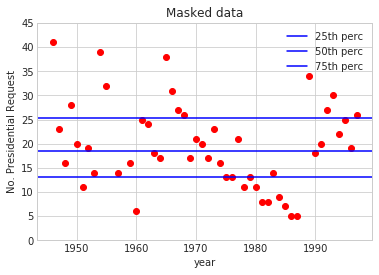

In [13]:
#### Ploting the new plot without outliers
plt.close('all')
plt.figure(3)
plt.title("Masked data")
plt.plot(x, y_masked, 'ro')
plt.xlabel('year')
plt.ylabel('No. Presidential Request')
plt.ylim(0 , 45)
plt.axhline(perc_25_request, label='25th perc', c='b')
plt.axhline(perc_50_request, label='50th perc', c='b')
plt.axhline(perc_75_request, label='75th perc', c='b')
plt.legend(loc='best')
plt.show()

Note = I know that the 0-values were the outliers because I replaced them the Null values by 0-values.

## Grouping the data

In [14]:
# importing other necesary libraries
from collections import Counter
from collections import OrderedDict
from matplotlib.pylab import frange

In [25]:
# Select the data using frecuency
x_freq = Counter(y)
x_ = np.array(list(x_freq.keys()))
y_ = np.array(list(x_freq.values()))


In [27]:
# Grouping the data
x_group = OrderedDict()
group = 5
group_count = 1
keys = []
values = []
for i, xx in enumerate(x):
    #Individual data point is append
    keys.append(xx)
    values.append(y[i])
    if group_count == group:
        # covnert list of keys to a tuple
        x_group[tuple(keys)] = values
        keys = []
        values = []
        group_count = 1
    
    group_count+=1 
    
x_group[tuple(keys)] = values

Text(0,0.5,'Frequency')

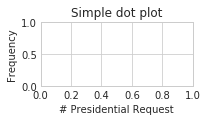

In [32]:
# Ploting the data as dot plot
plt.subplot(311)
plt.title("Dot Plot by Frequency")

##########Ploting frequency
plt.plot(y_ , x_ , 'ro')
plt.xlabel('Count')
plt.ylabel('# Presedential Request')
###### Setting min and max
plt.xlim(min(y_)-1 , max(y_)+1)

plt.subplot(321)
plt.title("Simple dot plot")
plt.xlabel('# Presidential Request')
plt.ylabel('Frequency')
#plt.show()
